<a href="https://colab.research.google.com/github/TanisqSinghal/Data_science_internship/blob/main/Lecture_of_Decision_Tree_and_Random_forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv("Placement_Data.csv",index_col='sl_no')

In [ ]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [ ]:
### Data Visalization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
## Draw scatter plot between 10th and 12th precentage


Text(0.5, 1.0, 'Scatter plot between 10th and 12th precentage')

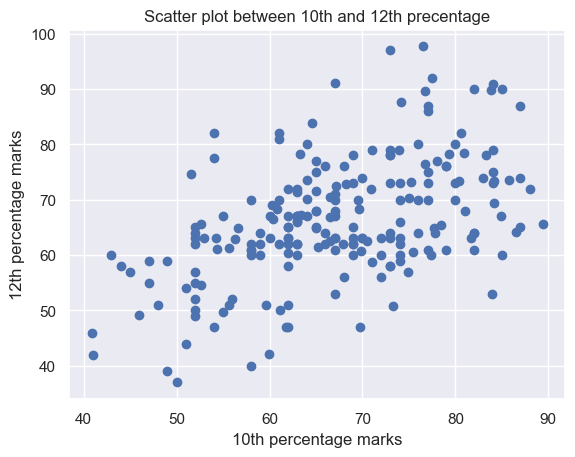

In [ ]:
plt.scatter(df['ssc_p'],df['hsc_p'])
plt.xlabel('10th percentage marks')
plt.ylabel('12th percentage marks')
plt.title("Scatter plot between 10th and 12th precentage")


In [ ]:
colors={'Placed': 'tab:green', 'Not Placed': 'tab:red'}

In [ ]:
df['status'].map(colors)

sl_no
1      tab:green
2      tab:green
3      tab:green
4        tab:red
5      tab:green
         ...    
211    tab:green
212    tab:green
213    tab:green
214    tab:green
215      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, 'Scatter plot between 10th and 12th precentage')

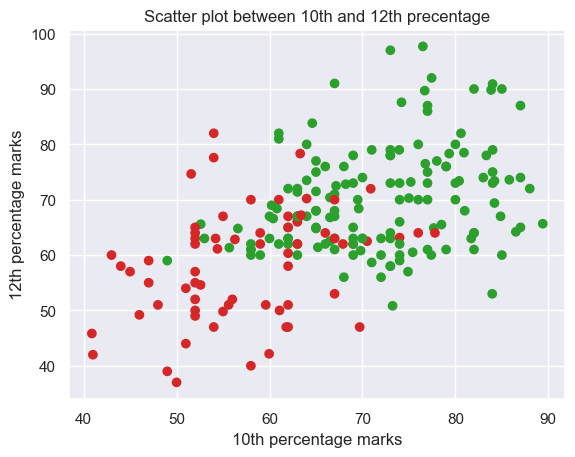

In [ ]:
plt.scatter(df['ssc_p'],df['hsc_p'], c=df['status'].map(colors))
plt.xlabel('10th percentage marks')
plt.ylabel('12th percentage marks')
plt.title("Scatter plot between 10th and 12th precentage")

## Pair plot of continue data type


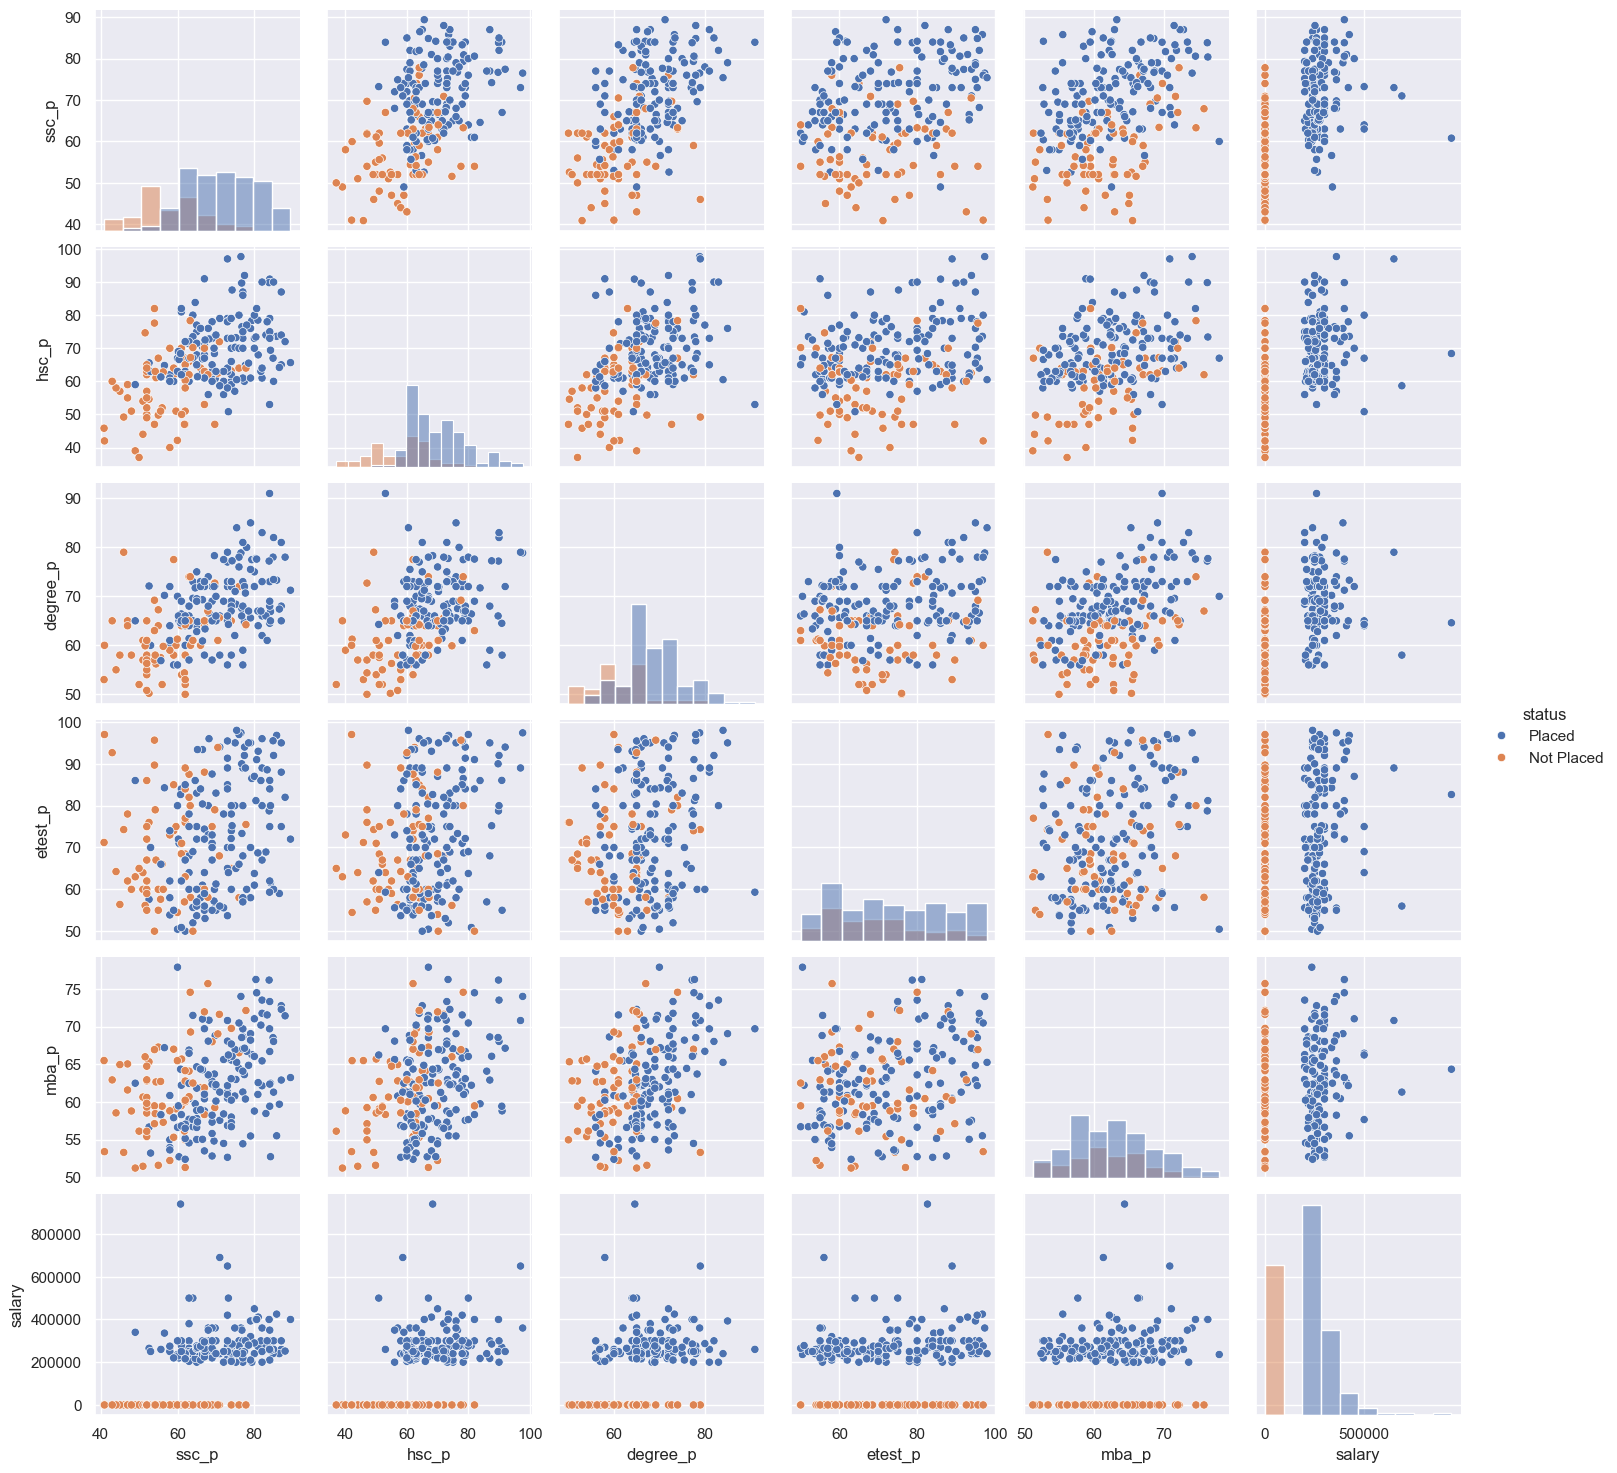

In [ ]:
sns.pairplot(df, hue='status',diag_kind='hist')

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


## Draw a boxblot for 10th & 12th percentage of students

<Axes: ylabel='ssc_p'>

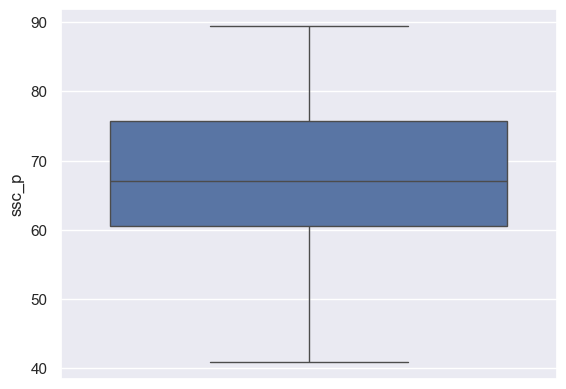

In [ ]:
sns.boxplot(y='ssc_p',data=df)

<Axes: ylabel='hsc_p'>

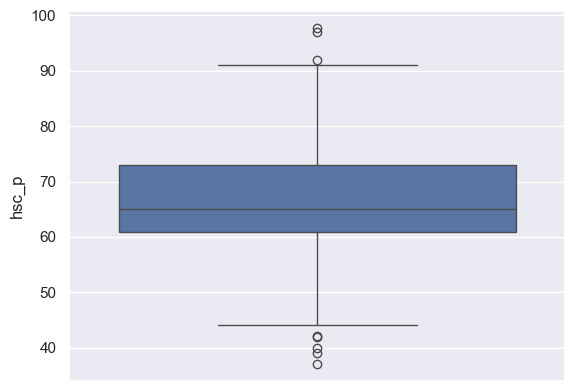

In [ ]:
sns.boxplot(y='hsc_p',data=df)

<Axes: xlabel='status', ylabel='hsc_p'>

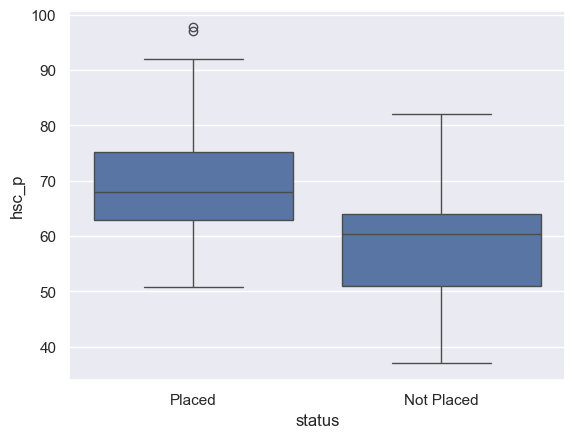

In [ ]:
sns.boxplot(y='hsc_p',data=df,x='status')

# line plots

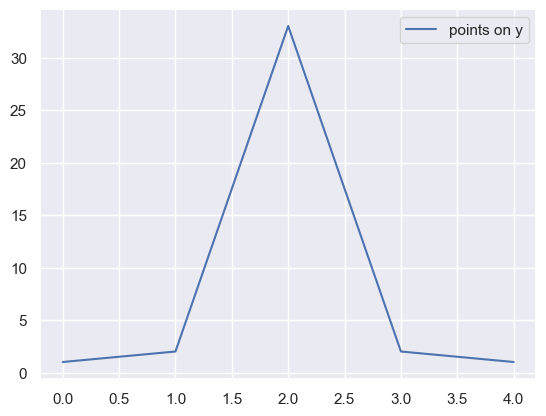

In [ ]:
y=[1,2,33,2,1]
plt.plot(y, label='points on y')
plt.legend()

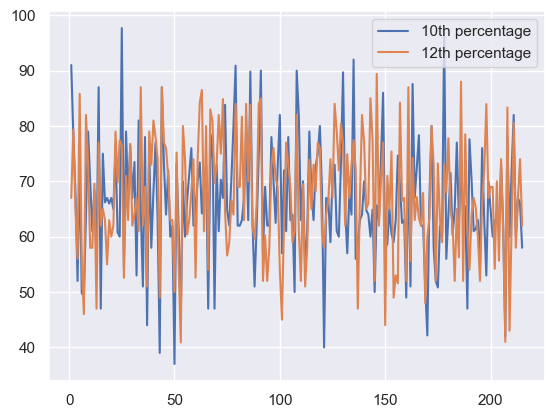

In [ ]:
plt.plot(df['hsc_p'],label='10th percentage')
plt.plot(df['ssc_p'],label='12th percentage')
plt.legend()

In [ ]:
df.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


<Axes: >

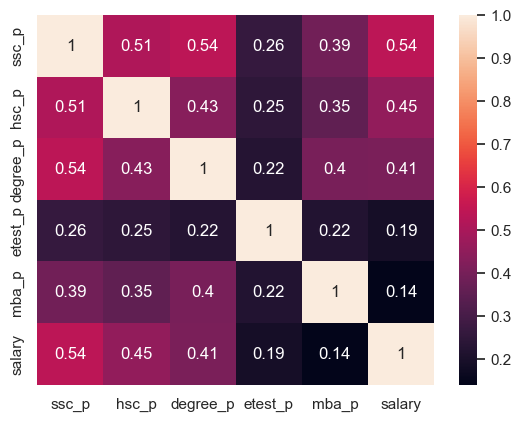

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

(array([67.,  0., 94., 38., 10.,  3.,  1.,  1.,  0.,  1.]),
 array([     0.,  94000., 188000., 282000., 376000., 470000., 564000.,
        658000., 752000., 846000., 940000.]),
 <BarContainer object of 10 artists>)

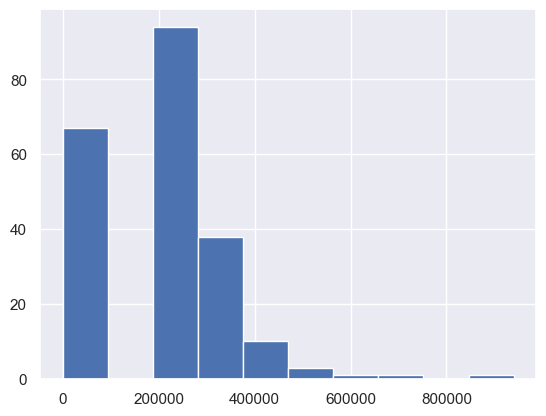

In [ ]:
plt.hist(df['salary'])

<Axes: xlabel='salary', ylabel='Density'>

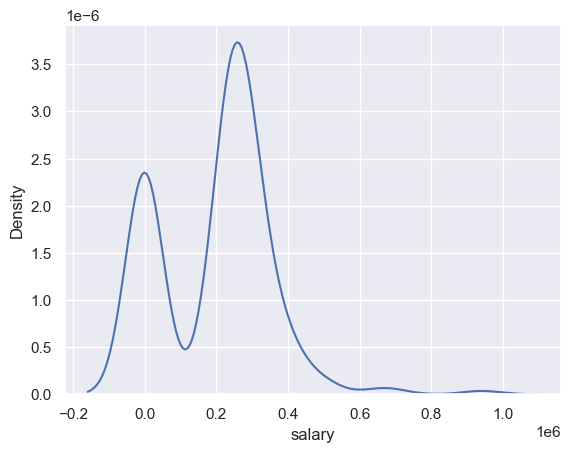

In [ ]:
sns.kdeplot(df['salary'])

## Outlier Analysis

<Axes: ylabel='degree_p'>

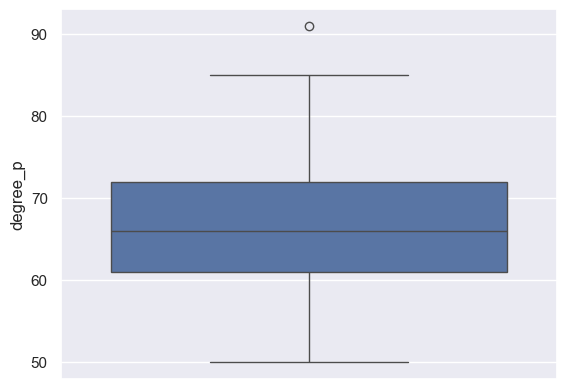

In [ ]:
sns.boxplot(y="degree_p",data=df)

In [ ]:
percentile25=df['degree_p'].quantile(0.25)

In [ ]:
percentile75=df['degree_p'].quantile(0.75)
iqr=percentile75-percentile25
iqr

11.0

In [ ]:
uper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)

In [ ]:
df=df[df['degree_p']<uper_limit]
df=df[df['degree_p']>lower_limit]


In [ ]:
col=['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']

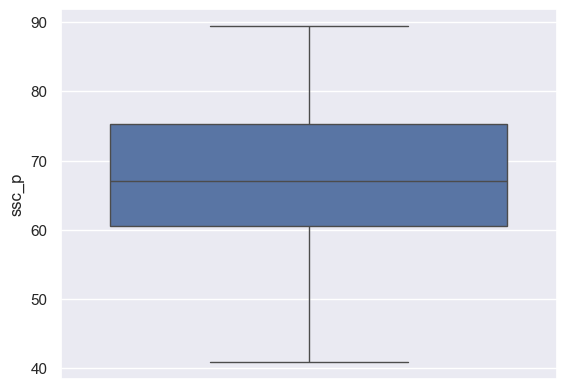

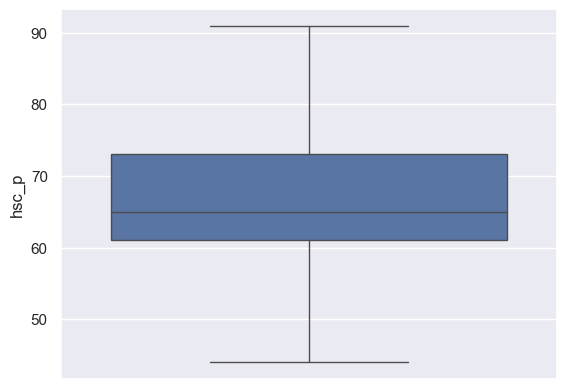

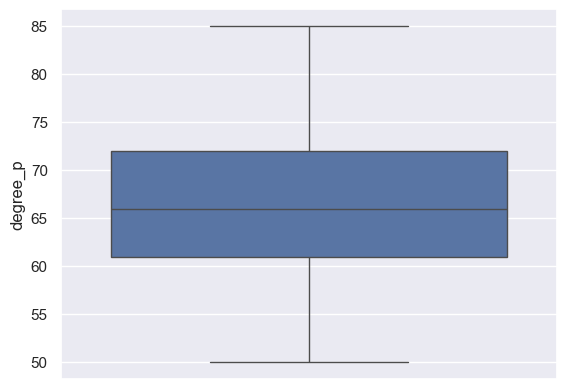

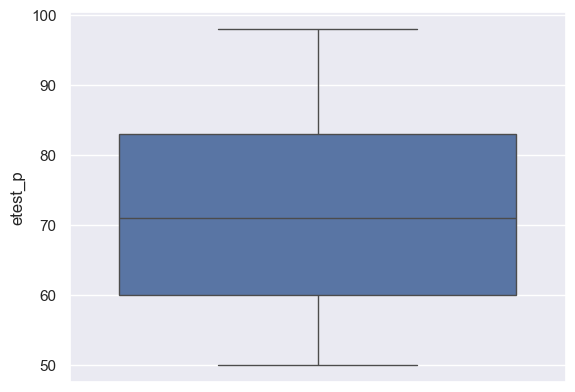

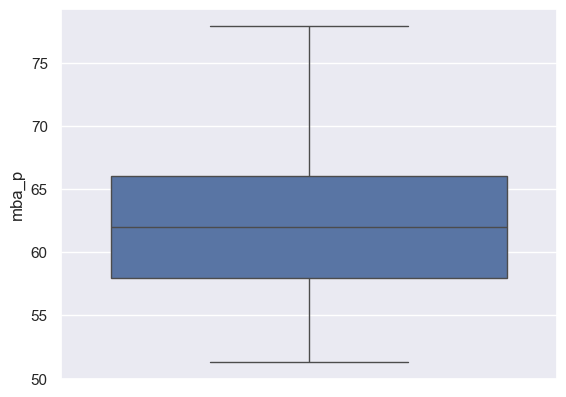

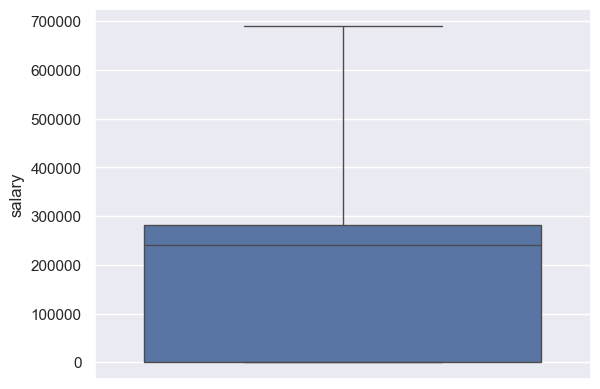

In [ ]:
for c in col:
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    uper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    df=df[df[c]<uper_limit]
    df=df[df[c]>lower_limit]
    plt.figure()
    sns.boxplot(y=c,data=df)


In [ ]:
for i in col:
    percentile25=df[i].quantile(0.25)
    percentile75=df[i].quantile(0.75)
    iqr=percentile75-percentile25
    uper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    print("Uper Limit of " , i, 'Coloumn : ' ,uper_limit)
    print("Lower Limit of ", i, 'Coloumn : ' ,lower_limit)


Uper Limit of  ssc_p Coloumn :  97.37500000000003
Lower Limit of  ssc_p Coloumn :  39.17499999999998
Uper Limit of  hsc_p Coloumn :  91.0
Lower Limit of  hsc_p Coloumn :  43.0
Uper Limit of  degree_p Coloumn :  88.5
Lower Limit of  degree_p Coloumn :  44.5
Uper Limit of  etest_p Coloumn :  117.5
Lower Limit of  etest_p Coloumn :  25.5
Uper Limit of  mba_p Coloumn :  78.305
Lower Limit of  mba_p Coloumn :  45.76499999999999
Uper Limit of  salary Coloumn :  703125.0
Lower Limit of  salary Coloumn :  -421875.0


In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['ssc_b']=le.fit_transform(df['ssc_b'])

In [ ]:
df['ssc_b']

sl_no
2      0
3      0
4      0
5      0
6      1
      ..
211    1
212    1
213    1
214    1
215    0
Name: ssc_b, Length: 204, dtype: int32

In [ ]:
col=['gender','hsc_b','hsc_s','de-gree_t','workex','specialisation','status']

In [ ]:
for c in col:
    df[c]=le.fit_transform(df[c])

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
6,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 2 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          204 non-null    int32  
 1   ssc_p           204 non-null    float64
 2   ssc_b           204 non-null    int32  
 3   hsc_p           204 non-null    float64
 4   hsc_b           204 non-null    int32  
 5   hsc_s           204 non-null    int32  
 6   degree_p        204 non-null    float64
 7   degree_t        204 non-null    int32  
 8   workex          204 non-null    int32  
 9   etest_p         204 non-null    float64
 10  specialisation  204 non-null    int32  
 11  mba_p           204 non-null    float64
 12  status          204 non-null    int32  
 13  salary          204 non-null    float64
dtypes: float64(6), int32(8)
memory usage: 17.5 KB


In [ ]:
X=df.iloc[:,0:-2].values

In [ ]:
X

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
Y=df.iloc[:,-2].values

In [ ]:
Y

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3, random_state=45)

In [ ]:
X_train.shape

(142, 12)

In [ ]:
X_test.shape

(62, 12)

## Feature Scaling

In [ ]:
## Feature scaling is used if one column values are more in width then others column and it will dominate in the model /
## just like salary is more in width then hss_b here so we have to bring them in same

## Two types of feature Scaling

## 1. Normalization and to convert it has formula of  :- -------                                x-xmin / Xmax-Xmin
## 2. Standardization and to convert it has formula of  :-------                    x-mean of column / standard division of column

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.fit_transform(X_test)

# Decision Tree model

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
6,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0


In [ ]:
df1=df.copy()

In [ ]:
df.drop(columns=['status','salary'])

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
sl_no,,,,,,,,,,,,
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
6,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58
...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72


In [ ]:
X=df.drop(columns=['status','salary']).values

In [ ]:
X

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
Y=df['status'].values

In [ ]:
Y

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3, random_state=42)

## DecisionTree Classifies

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred=dtc.predict(X_test)

In [ ]:
confusion_matrix(Y_test, Y_pred)

NameError: name 'confusion_matrix' is not defined

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

NameError: name 'confusion_matrix' is not defined

In [ ]:
print('Value of True Negative =', tn,)
print('Value of False Positive = ', fp, )
print('Value of False Negative = ', fn,)
print('Value of Ture Positve = ',tp)

NameError: name 'tn' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, Y_pred)

0.7580645161290323

In [ ]:
(tn+tp)/(tn + fp + fn + tp)

NameError: name 'tn' is not defined

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57        15
           1       0.88      0.79      0.83        47

    accuracy                           0.76        62
   macro avg       0.69      0.73      0.70        62
weighted avg       0.79      0.76      0.77        62



In [ ]:
tp/(tp+fp)

NameError: name 'tp' is not defined

In [ ]:
tn/(tn+fn)

NameError: name 'tn' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

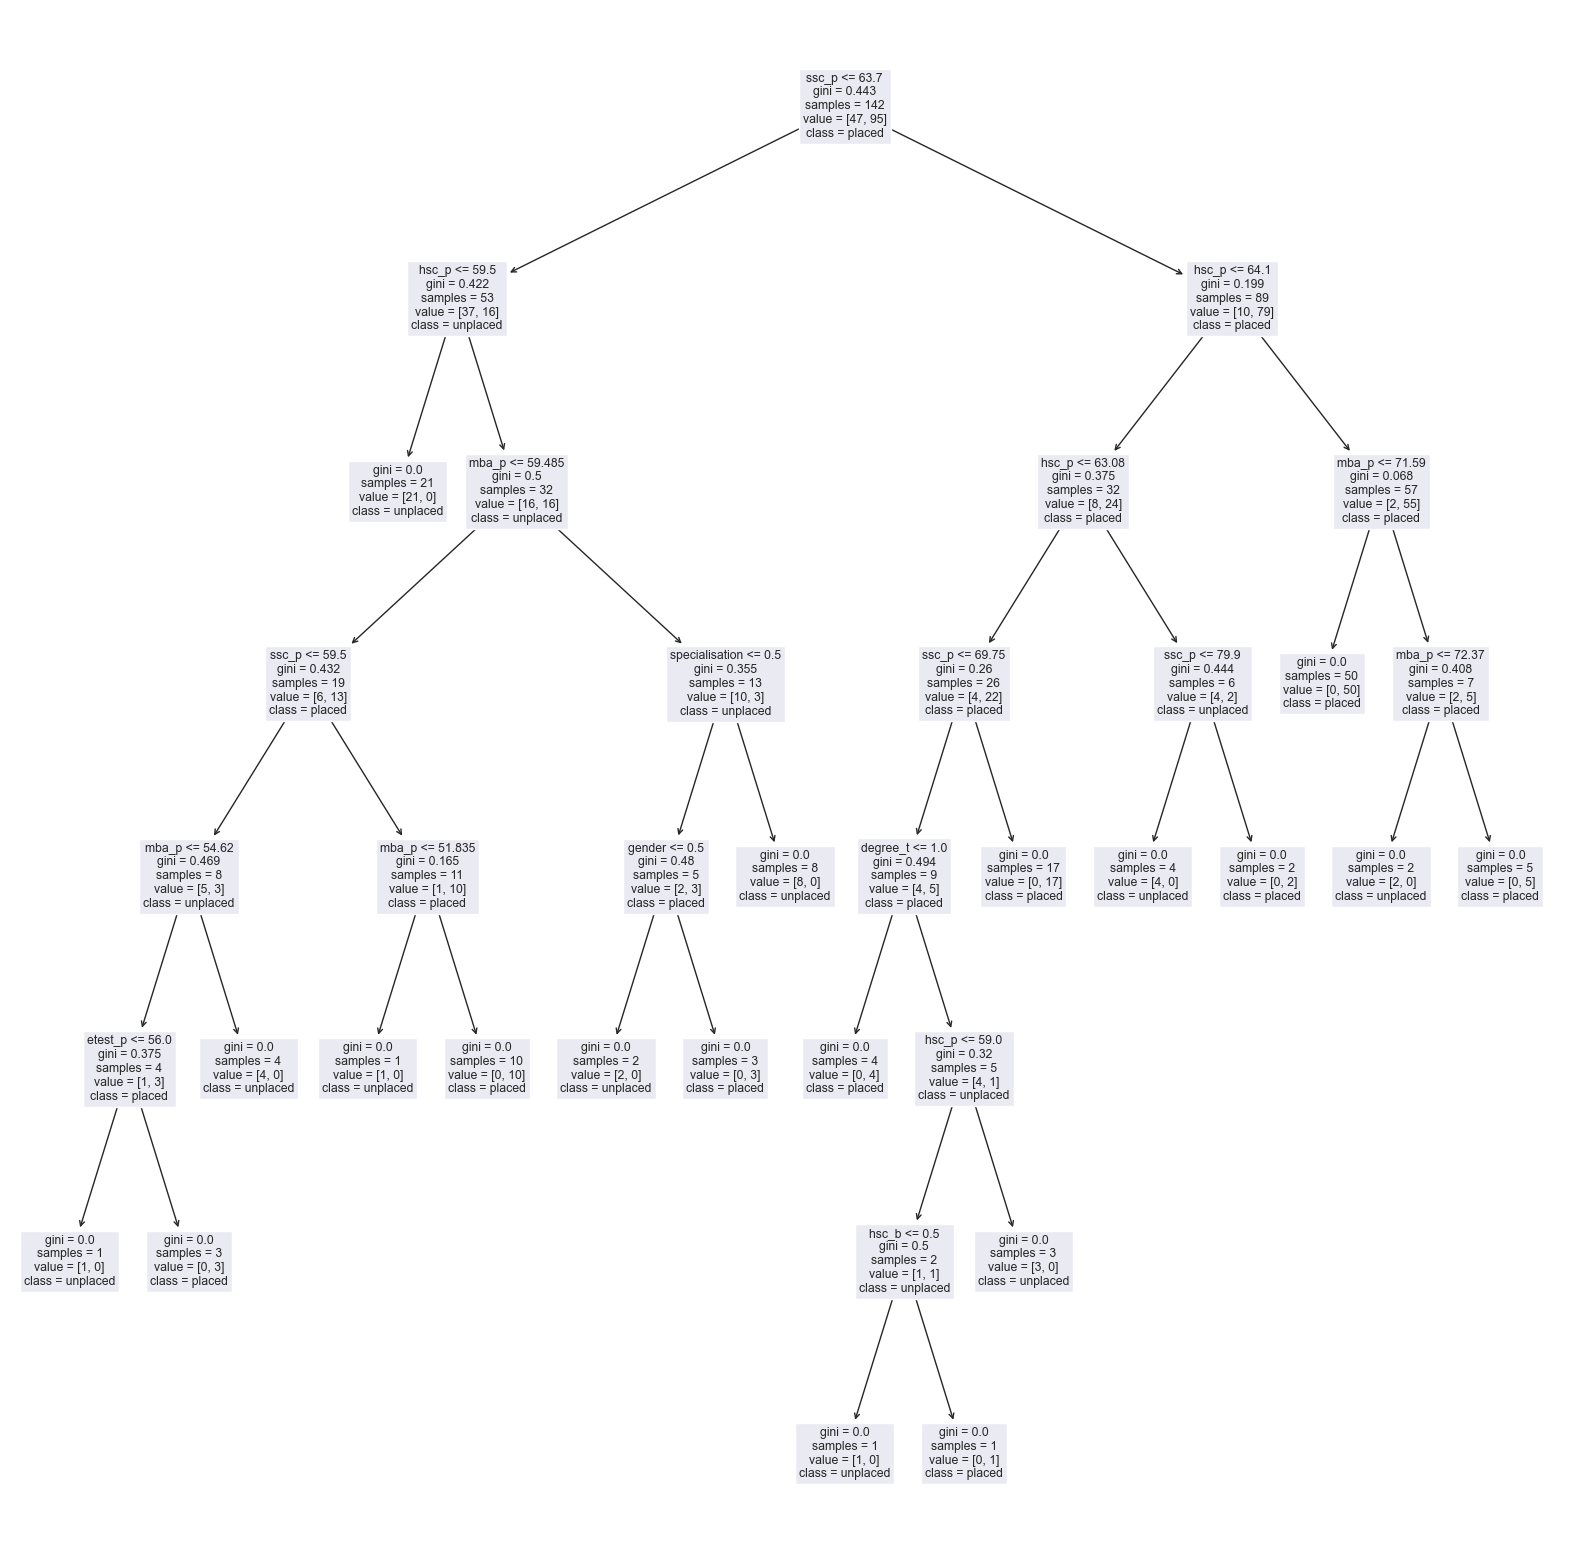

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dtc,feature_names=df.columns[:-2],class_names=['unplaced','placed'])
plt.show

In [ ]:
df.head(1)

## Random forrest classifier

In [ ]:
print([int(x) for x in np.linspace(10,40,num=12)])

[10, 12, 15, 18, 20, 23, 26, 29, 31, 34, 37, 40]


## set hyper parameters to the model

In [ ]:
n_estimators=[10,20,30,40,50,60,70,80,90,100]
max_features=['sqt','log2']
max_depth=[int(x) for x in np.linspace(10,40,num=12)]
min_samples_split=[6,10,15,20]
min_samples_leaf=[5,10,12]
criterion=['entropy', 'gini']

In [ ]:
random_grid={
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion' : criterion

}

In [ ]:
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['sqt', 'log2'],
 'max_depth': [10, 12, 15, 18, 20, 23, 26, 29, 31, 34, 37, 40],
 'min_samples_split': [6, 10, 15, 20],
 'min_samples_leaf': [5, 10, 12],
 'criterion': ['entropy', 'gini']}

In [ ]:
type(random_grid)

dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rscv=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=20,cv=5,n_jobs=-1)

In [ ]:
rscv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 12, 15, 18, 20, 23,
                                                      26, 29, 31, 34, 37, 40],
                                        'max_features': ['sqt', 'log2'],
                                        'min_samples_leaf': [5, 10, 12],
                                        'min_samples_split': [6, 10, 15, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [ ]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'gini'}

In [ ]:
randomfc=RandomForestClassifier( n_estimators = 20,
                                 min_samples_split= 6,
                                 min_samples_leaf= 5,
                                 max_features='log2',
                                 max_depth= 15,
                                 criterion='gini')

In [ ]:
rfc = randomfc.fit(X_train, Y_train)

In [ ]:
Y_pred= rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8387096774193549

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.88      0.91      0.90        47

    accuracy                           0.84        62
   macro avg       0.78      0.76      0.77        62
weighted avg       0.83      0.84      0.83        62

